In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# set this so the 
%matplotlib inline
import re

df = pd.read_csv('cleaned_properties.csv', low_memory=False)
#df.info()
print('The Record count in the dataset {}'.format(df.shape[0]))


The Record count in the dataset 54037


(-5.0, 50.0, -20.0, 1000000.0)

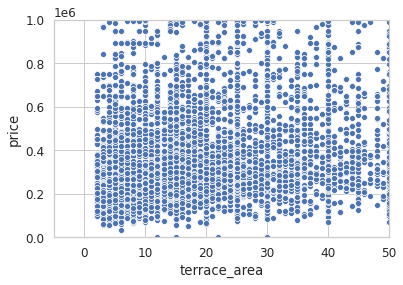

In [80]:
#Scatter plot
sns.scatterplot(x=df['terrace_area'], y=df['price'])
plt.axis([-5, 50, -20, 1000000])

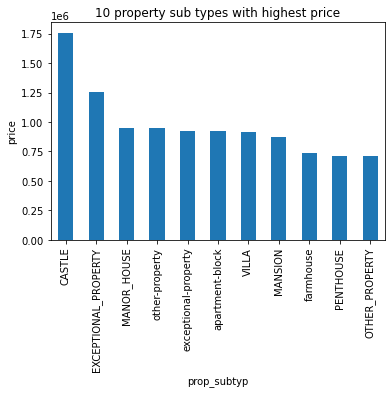

In [111]:
# Create a histogram with the 10 Property subtypes with highest price

prop_subtyp = df.groupby('property_subtype').mean()

# sort the value and get the Top 10 Subproperty
prop_subtyp = prop_subtyp.sort_values(by = 'price',ascending = False)[0:11]

# create the plot
prop_subtyp['price'].plot(kind='bar')

# Set the title and labels
plt.xlabel('prop_subtyp')
plt.ylabel('price')
plt.title('10 property sub types with highest price')
plt.savefig("./Property_subtype.png", transparent=True)
# show the plot
plt.show()

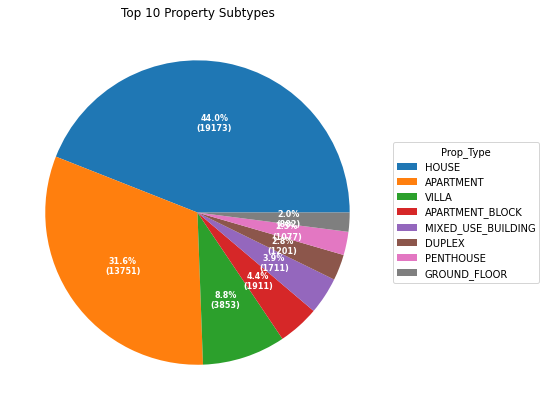

In [102]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))
x = df.property_subtype
# use the Counter class from collections to create a dictionary with keys(text) and frequency
property_counts = Counter(x)
df_prop = pd.DataFrame.from_dict(property_counts, orient='index')
df_prop = df_prop[0].sort_values(ascending = False)[0:9]
df_prop = df_prop.drop(labels = ['unknown']) 
Count = df_prop.values
Prop_Type = list(df_prop.index)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(Count, autopct=lambda pct: func(pct, Count),
                                  textprops=dict(color="w"))

ax.legend(wedges, Prop_Type,
          title="Prop_Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Top 10 Property Subtypes")

plt.show()